In [1]:
%set_env DEBUG=False
import sys

from loguru import logger
import pandas as pd
import matplotlib.pyplot as plt

from model.main import get_demolition_shares_per_tek
from model.Buildings import Buildings
from model.DatabaseManager import DatabaseManager

logger.remove()
logger.add(sys.stderr, level="INFO")

BUILDING_CATEGORY = "Apartment block"

env: DEBUG=False


In [2]:
building_category_list = DatabaseManager().get_building_category_list()
display(building_category_list)

array(['Apartment block', 'House', 'Kindergarten', 'School', 'University',
       'Office', 'Retail', 'Hotel', 'Hospital', 'Nursinghome', 'Culture',
       'Sports', 'Storage repairs'], dtype=object)

 # R Leil
 

## Rehabiliterte bygg

<Axes: >

,PRE_TEK49,TEK49,TEK69_1,TEK87,TEK97,TEK07,TEK10,TEK17,TEK21
0,85.00%,78.48%,63.93%,4.81%,0.00%,0.00%,0.00%,0.00%,0.00%
1,83.75%,79.02%,68.21%,5.77%,0.00%,0.00%,0.00%,0.00%,0.00%
2,82.50%,79.57%,72.50%,6.73%,0.00%,0.00%,0.00%,0.00%,0.00%
3,81.25%,80.11%,73.04%,7.69%,0.00%,0.00%,0.00%,0.00%,0.00%
4,80.00%,80.65%,73.59%,8.65%,0.00%,0.00%,0.00%,0.00%,0.00%
5,78.75%,81.20%,74.13%,9.62%,0.00%,0.00%,0.00%,0.00%,0.00%
6,77.50%,81.74%,74.67%,10.58%,0.96%,0.00%,0.00%,0.00%,0.00%
7,76.25%,82.28%,75.22%,11.54%,1.92%,0.00%,0.00%,0.00%,0.00%
8,75.00%,82.83%,75.76%,12.50%,2.88%,0.00%,0.00%,0.00%,0.00%
9,73.75%,83.37%,76.30%,16.79%,3.85%,0.00%,0.00%,0.00%,0.00%


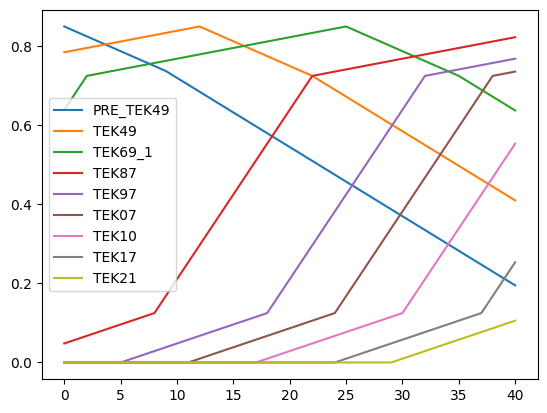

In [13]:
s = Buildings(BUILDING_CATEGORY)
renovation_tek = pd.DataFrame(s.get_total_renovation_shares_per_tek())
renovation_tek = renovation_tek.drop(columns=['TEK69_2', 'TEK69_3'], axis=1)
display(renovation_tek.plot())
display(renovation_tek.style.format({c:'{:,.2%}'.format for c in renovation_tek.columns}))

## Enøk i bygg


<Axes: >

,PRE_TEK49,TEK49,TEK69_1,TEK87,TEK97,TEK07,TEK10,TEK17,TEK21
0,90.00%,89.50%,86.25%,25.00%,0.00%,0.00%,0.00%,0.00%,0.00%
1,88.75%,89.75%,86.50%,29.00%,1.00%,0.00%,0.00%,0.00%,0.00%
2,87.50%,90.00%,86.75%,33.00%,2.00%,0.00%,0.00%,0.00%,0.00%
3,86.25%,90.00%,87.00%,37.00%,3.00%,0.00%,0.00%,0.00%,0.00%
4,85.00%,90.00%,87.25%,41.00%,4.00%,0.00%,0.00%,0.00%,0.00%
5,83.75%,90.00%,87.50%,45.00%,5.00%,0.00%,0.00%,0.00%,0.00%
6,82.50%,90.00%,87.75%,49.00%,9.00%,0.00%,0.00%,0.00%,0.00%
7,81.25%,90.00%,88.00%,53.00%,13.00%,1.00%,0.00%,0.00%,0.00%
8,80.00%,90.00%,88.25%,57.00%,17.00%,2.00%,0.00%,0.00%,0.00%
9,78.75%,90.00%,88.50%,61.00%,21.00%,3.00%,0.00%,0.00%,0.00%


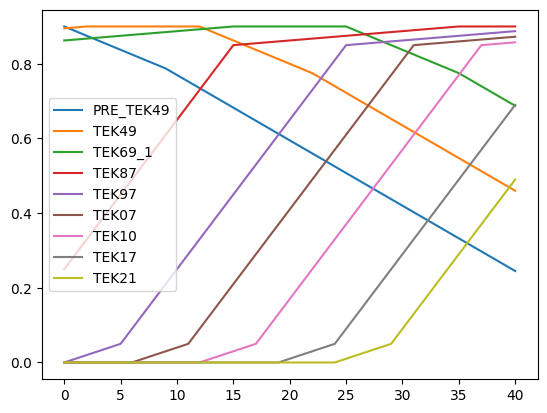

In [14]:
s = Buildings(BUILDING_CATEGORY)
small_measure_tek = pd.DataFrame(s.get_total_small_measure_shares_per_tek())
small_measure_tek = small_measure_tek.drop(columns=['TEK69_2', 'TEK69_3'], axis=1)

display(small_measure_tek.plot())
display(small_measure_tek.style.format({c:'{:,.2%}'.format for c in small_measure_tek.columns}))

## Riving

### S-kurve

,Riving
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
125,0.878125
126,0.881250
127,0.884375
128,0.887500


<Axes: >

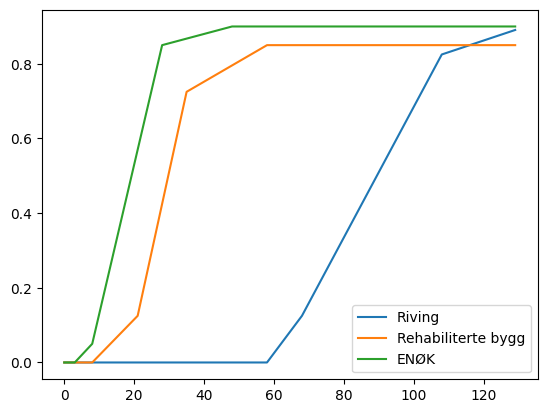

In [15]:
s = Buildings(BUILDING_CATEGORY)

demolition_rate_df = pd.DataFrame(s.s_curve_demolition)[['rate']].rename(columns={'rate': 'Riving'})
rehabilitation_df = pd.DataFrame(s.s_curve_renovation)[['rate']].rename(columns={'rate': 'Rehabiliterte bygg'})
small_measures_df = pd.DataFrame(s.s_curve_small_measure)[['rate']].rename(columns={'rate': 'ENØK'})
display(demolition_rate_df)
merged=pd.concat([demolition_rate_df, rehabilitation_df, small_measures_df], axis=1)
merged.plot()

### Riving andel per TEK


,PRE_TEK49,TEK49,TEK69_1,TEK69_2,TEK69_3,TEK87,TEK97,TEK07,TEK10,TEK17,TEK21
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
1,1.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,2.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
3,3.75%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,5.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
5,6.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
6,7.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
7,8.75%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
8,10.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
9,11.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

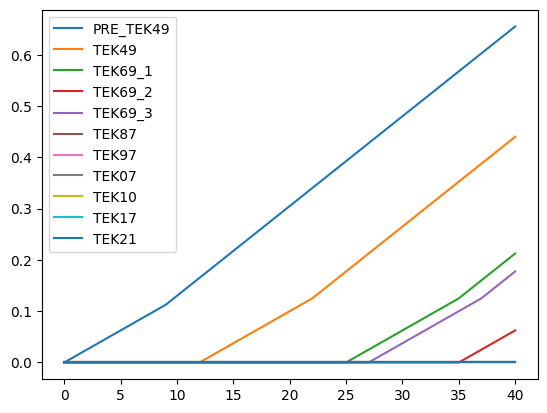

In [6]:
df = get_demolition_shares_per_tek('Apartment block')
display(df.style.format({c: '{:,.2%}'.format for c in df.columns}))
df.plot()

<Axes: >

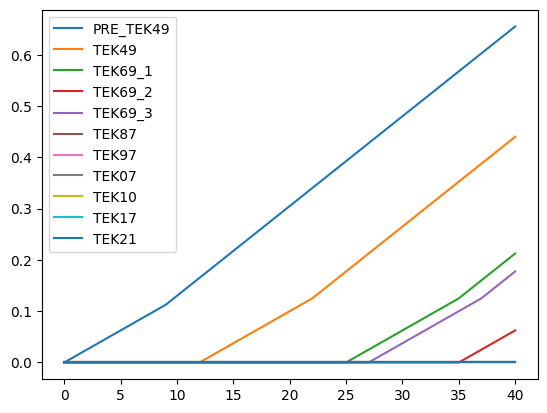

In [7]:
df.plot()

In [8]:
building_category_list = DatabaseManager().get_building_category_list()
s = Buildings(building_category_list[0])
small_measures_df = pd.DataFrame(s.s_curve_small_measure)
rehabilitation_df = pd.DataFrame(s.s_curve_renovation)
demolition_df = pd.DataFrame(s.s_curve_demolition)

small_measures_df = small_measures_df.rename(columns={'rate': 'small_measures'})
rehabilitation_df = rehabilitation_df.rename(columns={'rate': 'rehabilitation'})
demolition_df = demolition_df.rename(columns={'rate': 'demolition'})

merged_df = small_measures_df.merge(rehabilitation_df, on='year').merge(demolition_df, on='year')
merged_df

,year,small_measures,rehabilitation,demolition
0,1,0.00,0.00,0.000000
1,2,0.00,0.00,0.000000
2,3,0.00,0.00,0.000000
3,4,0.00,0.00,0.000000
4,5,0.01,0.00,0.000000
...,...,...,...,...
125,126,0.90,0.85,0.878125
126,127,0.90,0.85,0.881250
127,128,0.90,0.85,0.884375
128,129,0.90,0.85,0.887500


<Axes: >

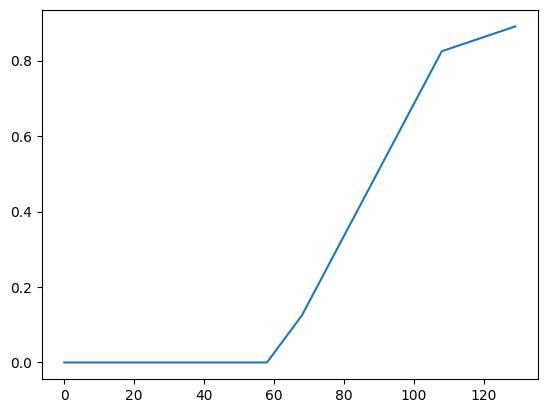

In [9]:
merged_df['demolition'].plot()
    

In [10]:
from ebm import Building
from ebm.model.Building import Building



ModuleNotFoundError: No module named 'ebm'

,PRE_TEK49,TEK49,TEK69_1,TEK69_2,TEK69_3,TEK87,TEK97,TEK07,TEK10,TEK17,TEK21
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
1,1.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,2.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
3,3.75%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,5.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
5,6.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
6,7.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
7,8.75%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
8,10.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
9,11.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

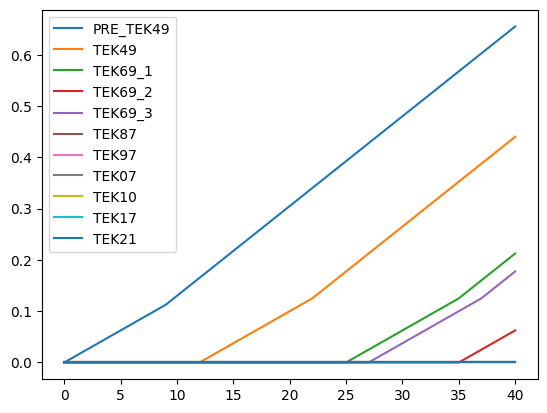

In [12]:
demolition_tek = get_demolition_shares_per_tek(BUILDING_CATEGORY)

display(demolition_tek.style.format({c:'{:,.2%}'.format for c in demolition_tek.columns}))
display(demolition_tek.plot())
